## Homework

This week we are going to use a new data set which contains 1070 purchases where the customer either purchased Citrus Hill or Minute Maid Orange Juice. 

In [15]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.externals.six import StringIO 
from sklearn import tree
import pydot
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
oj = pd.read_csv('OJ.csv')
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,0,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,0,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,1,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,0,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [3]:
oj.data = oj.iloc[:, 1:]
oj.target = oj.iloc[:, 0]

The features and the target variable are already prepared for you. What you are going to do is:

**1. Split**

Split the data set into two parts: training set and test set(with *random_state=0*, and *test_size=1.0/2*).


In [4]:
x_train, x_test, y_train, y_test = train_test_split(oj.data, oj.target, random_state=0, test_size=0.5)

**2. Support vector machine**

(1) Fit a svm model on the training set, report the training error and test error.(Just use the **svm.SVC** with default setting.)
    
(2) Change the value of parameter $C$ from $10^{-3}$ to $10^3$, make a plot to watch how the training error and test error varies. You can choose the value of $C$ from the array `np.logspace(-3, 3, 300)`.

In [5]:
svm = SVC()
svm.fit(x_train, y_train)

print "Training Accuracy:", svm.score(x_train, y_train)
print "Test Accuracy:", svm.score(x_test, y_test)

Training Accuracy: 0.773831775701
Test Accuracy: 0.697196261682


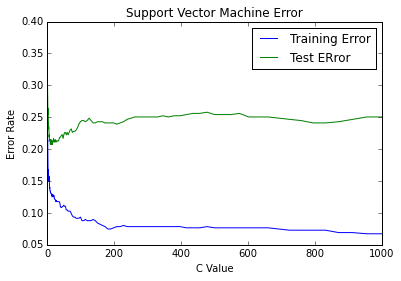

In [6]:
train = []
test = []
cVal = np.logspace(-3,3,300)

for i in cVal:
    svm = SVC(C=i)
    svm.fit(x_train, y_train)
    train.append(1 - svm.score(x_train, y_train))
    test.append(1 - svm.score(x_test, y_test))
    
plt.plot(cVal, train)
plt.plot(cVal, test)
plt.legend(['Training Error', 'Test ERror'], loc=1)
plt.title('Support Vector Machine Error')
plt.xlabel('C Value')
plt.ylabel('Error Rate')
plt.show()

**3. Decision tree**

(1) Fit a decision tree model on the training set with the default setting.
    
(2) Set the depth of the tree from 1 to 30. Look the varies of the training error and test error.
    
(3) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [7]:
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

(4) Plot the structure of the tree.
    
(5) What are the first 5 important features?

In [8]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print "Training Accuracy:", dtc.score(x_train, y_train)
print "Test Accuracy:", dtc.score(x_test, y_test)

Training Accuracy: 0.992523364486
Test Accuracy: 0.770093457944


In [9]:
train = []
test = []

for d in range(1, 31):
    dtc = DecisionTreeClassifier(max_depth=d)
    dtc.fit(x_train, y_train)
    train.append(1-dtc.score(x_train, y_train))
    test.append(1-dtc.score(x_test, y_test))
    
errors = pd.DataFrame({'max_depth': range(1,31), 'train_error': train, 'test_error': test})
errors

,max_depth,test_error,train_error
0,1,0.213084,0.216822
1,2,0.239252,0.196262
2,3,0.228037,0.168224
3,4,0.207477,0.132710
4,5,0.190654,0.123364
5,6,0.196262,0.108411
6,7,0.224299,0.078505
7,8,0.224299,0.071028
8,9,0.222430,0.052336
9,10,0.218692,0.035514


In [10]:
gridTree = GridSearchCV(DecisionTreeClassifier(), grid_para_tree)
gridTree.fit(x_train, y_train)

print "Best Parameters:"
print gridTree.best_params_
print "Score:", gridTree.best_score_

treeBest = gridTree.best_estimator_
print "Best Tree Training Score", treeBest.score(x_train, y_train)
print "Best Tree Test Score", treeBest.score(x_test, y_test)

Best Parameters:
{'criterion': 'gini', 'max_depth': 4}
Score: 0.805607476636
Best Tree Training Score 0.867289719626
Best Tree Test Score 0.792523364486


In [12]:
# dot_data = StringIO() 
# tree.export_graphviz(treeBest, out_file=dot_data) 
# graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
# graph.write_png("bestTree.png") 

# from IPython.display import Image
# Image(filename='bestTree.png') 

In [13]:
print zip(oj.data.columns, treeBest.feature_importances_)
print "Top 5 Features: LoyalCH, PriceDiff, SalePriceCH, Special CH, WeekofPurchase"

[('WeekofPurchase', 0.016077940832034628), ('StoreID', 0.0), ('PriceCH', 0.0), ('PriceMM', 0.0), ('DiscCH', 0.0), ('DiscMM', 0.0), ('SpecialCH', 0.011291129668023547), ('SpecialMM', 0.0), ('LoyalCH', 0.7302123573772521), ('SalePriceMM', 0.0054886547065514284), ('SalePriceCH', 0.0), ('PriceDiff', 0.12488704135875678), ('Store7', 0.0), ('PctDiscMM', 0.0), ('PctDiscCH', 0.0), ('ListPriceDiff', 0.066720147947098601), ('STORE', 0.045322728110282838)]
Top 5 Features: LoyalCH, PriceDiff, SalePriceCH, Special CH, WeekofPurchase


**4. Random Forest.**

(1) Fit a random forest on the training set. Report the training error and test error.
    
(2) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [14]:
grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31), "n_estimators": range(10, 110, 10)}

(3) What's the first 5 important features?

In [16]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print "Training Accuracy:", rfc.score(x_train, y_train)
print "Test Accuracy:", rfc.score(x_test, y_test)

Training Accuracy: 0.970093457944
Test Accuracy: 0.764485981308


In [19]:
grfc = GridSearchCV(RandomForestClassifier(), grid_para_forest)
grfc.fit(x_train, y_train)

print "Best Parameters:"
print grfc.best_params_
print "Score:", grfc.best_score_

forestBest = grfc.best_estimator_
print "Best Tree Training Score", forestBest.score(x_train, y_train)
print "Best Tree Test Score", forestBest.score(x_test, y_test)

Best Parameters:
{'n_estimators': 60, 'criterion': 'entropy', 'max_depth': 3}
Score: 0.829906542056
Best Tree Training Score 0.829906542056
Best Tree Test Score 0.78691588785


In [20]:
feature_importance = pd.DataFrame({'features':x_train.columns, 'importance': forestBest.feature_importances_}).sort_values(by='importance', ascending=False)
feature_importance[:5]

,features,importance
8,LoyalCH,0.430642
1,StoreID,0.077224
15,ListPriceDiff,0.076347
9,SalePriceMM,0.063970
16,STORE,0.061824
